In [1]:
import os
import json

import cv2
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
# conatins all helper function 
from utils import *

In [3]:
## Path to image data
image_path = os.path.join(os.path.dirname(os.path.realpath('__file__')),"Damage Identification\\images\\")
car_parts_meta_path = os.path.join(os.path.dirname(os.path.realpath('__file__')),"Damage Identification\\data")
damage_meta_path = os.path.join(os.path.dirname(os.path.realpath('__file__')),"Damage Identification\\data")

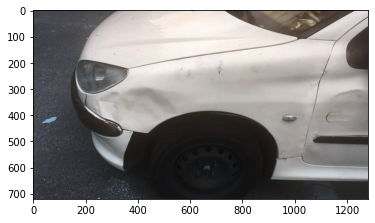

In [4]:
# make sure the images and data files are present in the above path or edit them to match path
filename = str(input("Enter filename"))
# filename = "2"

# stores damage & parts json
damage_file = open(os.path.join(damage_meta_path,filename+'-damages.json'))
car_file = open(os.path.join(car_parts_meta_path,filename+"-car-parts.json"))

car_image = cv2.imread(os.path.join(image_path, filename+".jpg"))

# loading json to var
damage_data = json.load(damage_file)
car_data = json.load(car_file)

# lets see the image we just read
plt.imshow(car_image)

In [5]:
# getting our image dimension
dim = car_image.shape
height, width = dim[0], dim[1]

# lets normalize the coordinates we have
# formula used to denormalize
# denormalized_x = (x*image_width)/100 ; denormalized_y = (y*image_height)/100
damage_coordinates = deNormalizePoints(damage_data)
parts_coordinates = deNormalizePoints(car_data)

# lets save our labels for both damage and car parts
damage_labels = polygonLabels(damage_data)
parts_labels = polygonLabels(car_data)

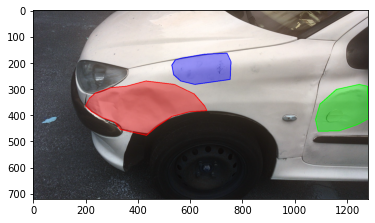

In [6]:
# masking of damage area
img = maskImage(car_image,damage_coordinates)
plt.imshow(img)

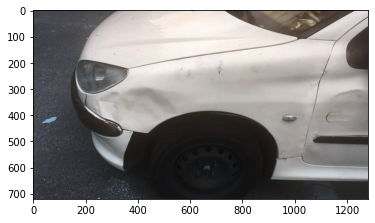

In [7]:
plt.imshow(car_image)

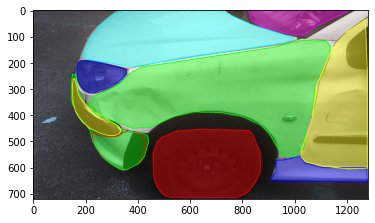

In [8]:
# masking of the car parts we have 
img = maskImage(car_image,parts_coordinates)
plt.imshow(img)

True

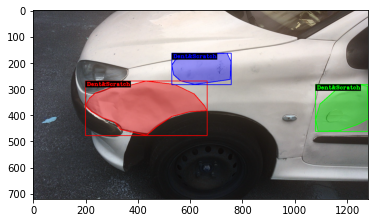

In [9]:
# let's draw our bounding box for damage parts
#
# area of interest for damage (polygon) 
img = maskImage(car_image,damage_coordinates)
# saving the result (only transparent polygon are drawn : Visualization 1)
cv2.imwrite(filename+"-visualizeation-1.jpg", img)


# finding the coordinates for the bounding box 
boundingBox = boundingBoxCoordinates(damage_coordinates,height,width)
# drawing the bounding box 
# added the label
img = DrawBox(img,boundingBox,damage_labels)
plt.imshow(img)

# saving the img
# cv2.imwrite(filename+"-visualizeation-2.jpg", img)

In [10]:
# uncomment below lines for better output

# cv2.imshow("visualize img", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

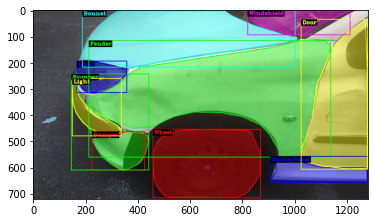

In [11]:
# let's draw bounding box for car parts
#
# area of interest for car parts (polygon) 
img = maskImage(car_image,parts_coordinates)
# saving the result (only transparent polygon are drawn for car parts : Visualization 1)
# cv2.imwrite(filename+"-visualizeation-1-car-parts.jpg", img)


# finding the coordinates for the bounding box 
boundingBox = boundingBoxCoordinates(parts_coordinates,height,width)
# drawing the boudning box 
img = DrawBox(img,boundingBox,parts_labels)
plt.imshow(img)

# saving the img
cv2.imwrite(filename+"-visualizeation-2.jpg", img)
